In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('heart.csv.xls')

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [32]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [33]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [36]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [38]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isnull().values.any()

False

In [8]:
df.shape

(918, 12)

In [167]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# EDA

#### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

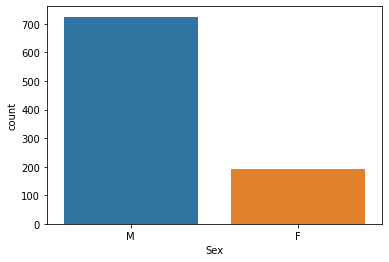

In [45]:
sns.countplot(data=df , x='Sex')

In [43]:
# Male count is more as compared to female and this can be a biased problem.
# So I will use upscaling to increase the female count.

In [39]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

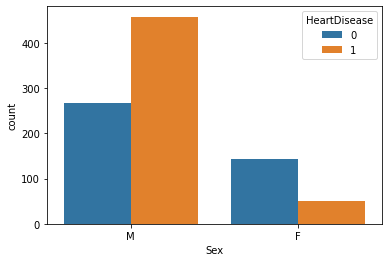

In [42]:
sns.countplot(data=df, x='Sex', hue='HeartDisease')

In [44]:
# Male are more pronic to heart disease as compared to females

<AxesSubplot:xlabel='Sex', ylabel='count'>

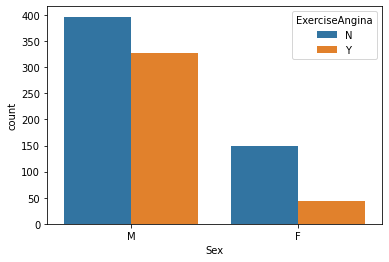

In [48]:
sns.countplot(x=df.Sex, hue=df.ExerciseAngina)

<AxesSubplot:xlabel='Sex', ylabel='count'>

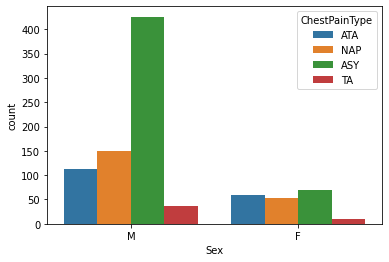

In [49]:
sns.countplot(x=df.Sex, hue=df.ChestPainType)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

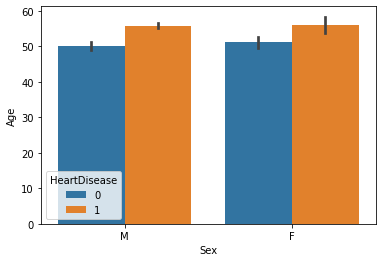

In [86]:
sns.barplot(y=df.Age, x=df.Sex, hue=df.HeartDisease)

<AxesSubplot:xlabel='Sex', ylabel='MaxHR'>

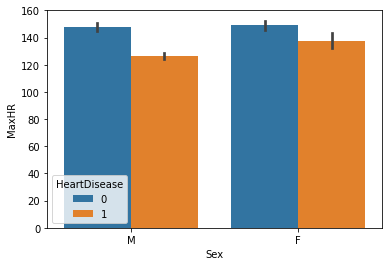

In [87]:
sns.barplot(x=df.Sex, y=df.MaxHR, hue=df.HeartDisease)

In [50]:
# Most common pain type is ASY.

#### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

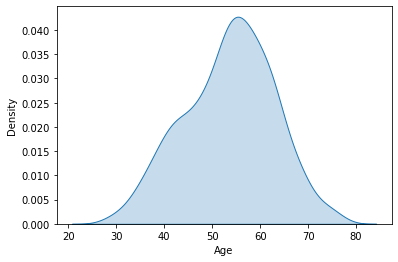

In [61]:
sns.kdeplot(x=df.Age, shade=True)

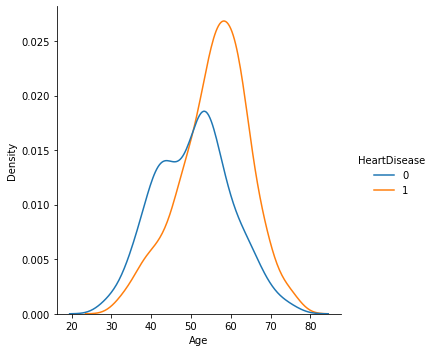

In [92]:
sns.displot(x=df.Age, hue=df.HeartDisease, kind='kde')

<AxesSubplot:xlabel='Age'>

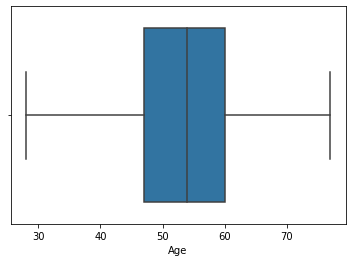

In [67]:
sns.boxplot(data=df, x=df.Age)  ## No outliers

<AxesSubplot:xlabel='Age', ylabel='Count'>

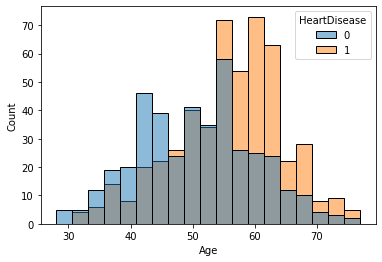

In [71]:
sns.histplot(data=df, x=df.Age, hue=df.HeartDisease)

<AxesSubplot:xlabel='ChestPainType', ylabel='Age'>

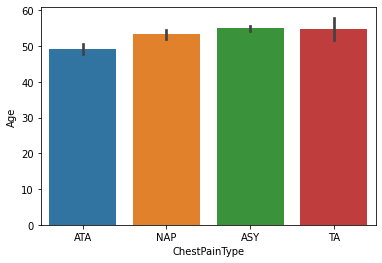

In [77]:
sns.barplot(data=df, x=df.ChestPainType, y=df.Age)

<Figure size 1800x1200 with 0 Axes>

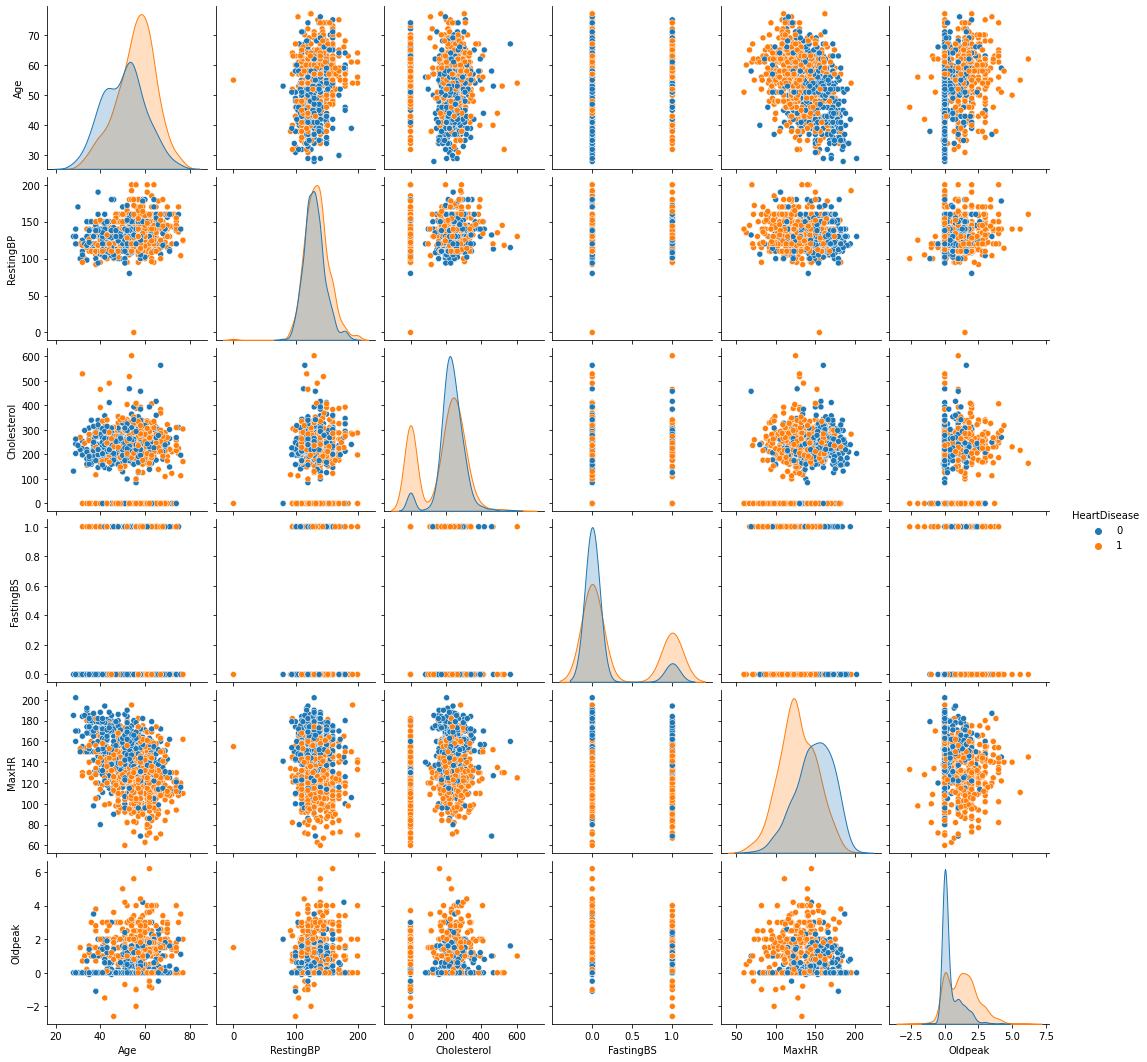

In [90]:
plt.figure(dpi=300)
sns.pairplot(data=df, hue='HeartDisease')

<AxesSubplot:>

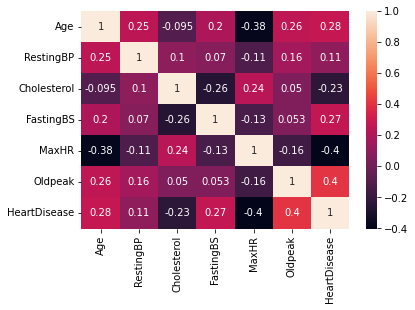

In [100]:
sns.heatmap(df.corr(), annot=True)

# End Of Eda

# ......................

# Handling Outliers

In [102]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
745,63,F,ASY,108,269,0,Normal,169,Y,1.8,Flat,1


<AxesSubplot:xlabel='Age'>

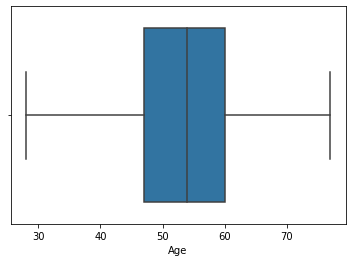

In [104]:
sns.boxplot(x=df.Age)

<AxesSubplot:xlabel='RestingBP'>

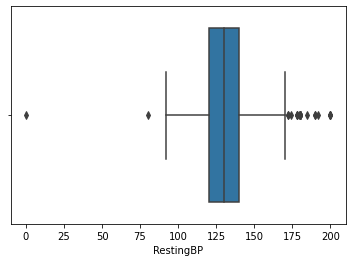

In [105]:
sns.boxplot(x=df.RestingBP)

<AxesSubplot:xlabel='Cholesterol'>

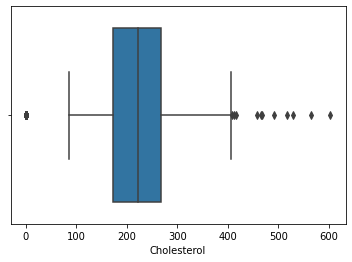

In [106]:
sns.boxplot(x=df.Cholesterol)

<AxesSubplot:xlabel='FastingBS'>

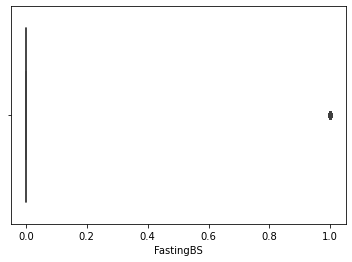

In [107]:
sns.boxplot(x=df.FastingBS)

<AxesSubplot:xlabel='MaxHR'>

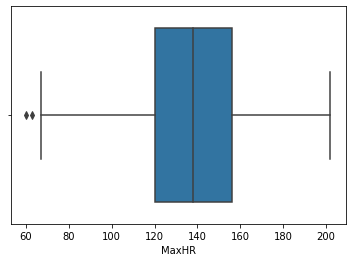

In [108]:
sns.boxplot(x=df.MaxHR)

<AxesSubplot:xlabel='Oldpeak'>

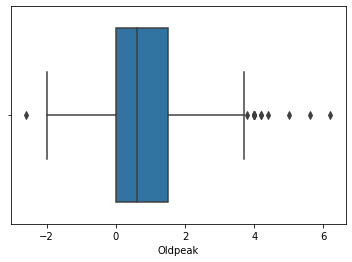

In [109]:
sns.boxplot(x=df.Oldpeak)

In [110]:
from scipy import stats

In [135]:
numerical_df = df.select_dtypes(include=np.number)

In [136]:
numerical_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [137]:
data = df[(np.abs(stats.zscore(numerical_df))<3).all(axis=1)]

In [138]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [140]:
data.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [141]:
data.isna().values.any()

False

# Converting Categorial data into numerical data

In [142]:
categorical_df = df.select_dtypes(exclude=np.number)

In [143]:
categorical_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [144]:
cat_df = pd.get_dummies(categorical_df, drop_first=True)

In [145]:
cat_df.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1


In [147]:
cat_df.isna().values.sum()

0

### My Final df as final_df

In [126]:
final_df = pd.concat([data, cat_df], axis=1)
final_df.sample()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
242,55.0,160.0,292.0,1.0,143.0,2.0,1.0,1,1,0,0,1,0,1,1,0


In [148]:
final_df.isna().values.sum()

133

In [150]:
final_df.dropna(inplace=True)

In [151]:
final_df.isna().values.sum()

0

# ML

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Let's perform Logistic Regression and RandomForest(before upscaling)

In [153]:
X = final_df.drop('HeartDisease', axis=1)

In [154]:
y = final_df.HeartDisease

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [156]:
logistic = LogisticRegression()

In [157]:
logistic.fit(X_train, y_train)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [158]:
predict = logistic.predict(X_test)

In [159]:
predict

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [161]:
accuracy_score(predict, y_test)

0.9037037037037037

<AxesSubplot:>

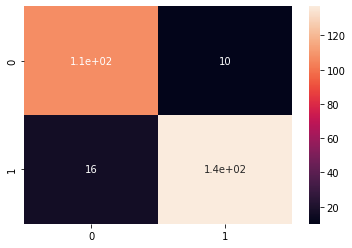

In [180]:
sns.heatmap(confusion_matrix(predict, y_test), annot=True)

In [168]:
rfc = RandomForestClassifier()

In [169]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [170]:
predict_rfc = rfc.predict(X_test)

In [171]:
predict_rfc

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [172]:
accuracy_score(predict_rfc, y_test)

0.8777777777777778

<AxesSubplot:>

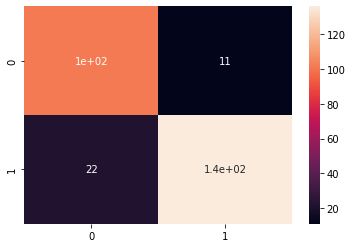

In [173]:
sns.heatmap(confusion_matrix(predict_rfc, y_test), annot=True)

#### MY LOGISTICS REGERSSOR PERFORMED WELL AS COMPARED TO RANDOMFOREST